# **Tentang Dataset**

* Dataset yang digunakan dalam penelitian ini adalah Wholesale Customers Data Set, yang berasal dari UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/292/wholesale+customers. Dataset ini banyak digunakan dalam studi mengenai segmentasi pelanggan dan analisis perilaku pembelian.
* Dataset ini berisi data pengeluaran tahunan pelanggan grosir pada berbagai kategori produk. Tujuan utamanya adalah menyediakan informasi yang dapat digunakan untuk mengidentifikasi pola pembelian dan mengelompokkan pelanggan berdasarkan perilaku mereka.

# **Latar Belakang**

Dalam dunia bisnis grosir, setiap pelanggan memiliki pola pengeluaran yang berbeda tergantung pada kebutuhan dan jenis usahanya. Tanpa segmentasi yang jelas, perusahaan sulit menyusun strategi pemasaran yang tepat dan efisien. Untuk mengatasi hal tersebut, diperlukan pendekatan analisis data yang mampu mengelompokkan pelanggan berdasarkan kesamaan perilaku pembelian mereka.

Salah satu metode yang dapat digunakan adalah KMeans Clustering, yaitu teknik machine learning yang dapat membagi pelanggan ke dalam beberapa kelompok berdasarkan pola pengeluaran tahunan mereka pada berbagai kategori produk seperti makanan segar, susu, grocery, dan lainnya. Dengan segmentasi ini, perusahaan dapat memahami kebutuhan setiap kelompok pelanggan dan merancang strategi bisnis yang lebih efektif.

# **Formulasi Masalah**

Perusahaan grosir menjual berbagai jenis produk kepada beragam jenis pelanggan, seperti retail kecil dan bisnis Horeca (Hotel, Restoran, dan Kafe). Setiap pelanggan memiliki pola pengeluaran yang berbeda terhadap kategori produk seperti makanan segar, susu, makanan beku, grocery, dan perlengkapan kebersihan.

Namun, perusahaan belum memiliki sistem segmentasi pelanggan yang jelas. Seluruh pelanggan diperlakukan secara seragam tanpa mempertimbangkan karakteristik belanja mereka. Akibatnya:



1.   Strategi pemasaran tidak tertarget dan berisiko tidak efektif.


2.   Pengelolaan stok barang tidak optimal karena tidak tahu produk mana yang dominan dibutuhkan oleh segmen tertentu.

3.   Peluang untuk meningkatkan loyalitas pelanggan dan efisiensi operasional menjadi terhambat.



# **Permasalahan Diselesaikan**

Bagaimana mengelompokkan pelanggan grosir berdasarkan pola pengeluaran tahunan mereka agar perusahaan dapat menyusun strategi pemasaran, logistik, dan layanan pelanggan yang lebih efektif dan tepat sasaran?

In [ ]:
import pandas as pd
import numpy as np
import warnings
from google.colab import drive

# **Eksplorasi dan Persiapan Data**

* Dataset terdiri dari 440 baris data dan 8 kolom fitur, masing-masing merepresentasikan informasi pelanggan ritel.


In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


* Hasil menunjukkan bahwa seluruh kolom bertipe int64, dan tidak terdapat missing value pada dataset (semua baris terisi lengkap).

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())
# print(df.corr())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.00

* Histogram Melihat apakah distribusi fitur numerik simetris atau miring (skewed), karena fitur yang sangat skewed dapat memengaruhi KMeans.
* Seluruh fitur menunjukkan distribusi yang condong ke kanan (right-skewed) yang artinya Sebagian besar data berada di nilai rendah, ini mengindikasikan seluruh fitur memiliki distribusi tidak simetris dan adanya outlier atau pelanggan ekstrem dengan pembelian sangat besar. Perlu dilakukan normalisasi atau transformasi skala agar fitur lebih seimbang.

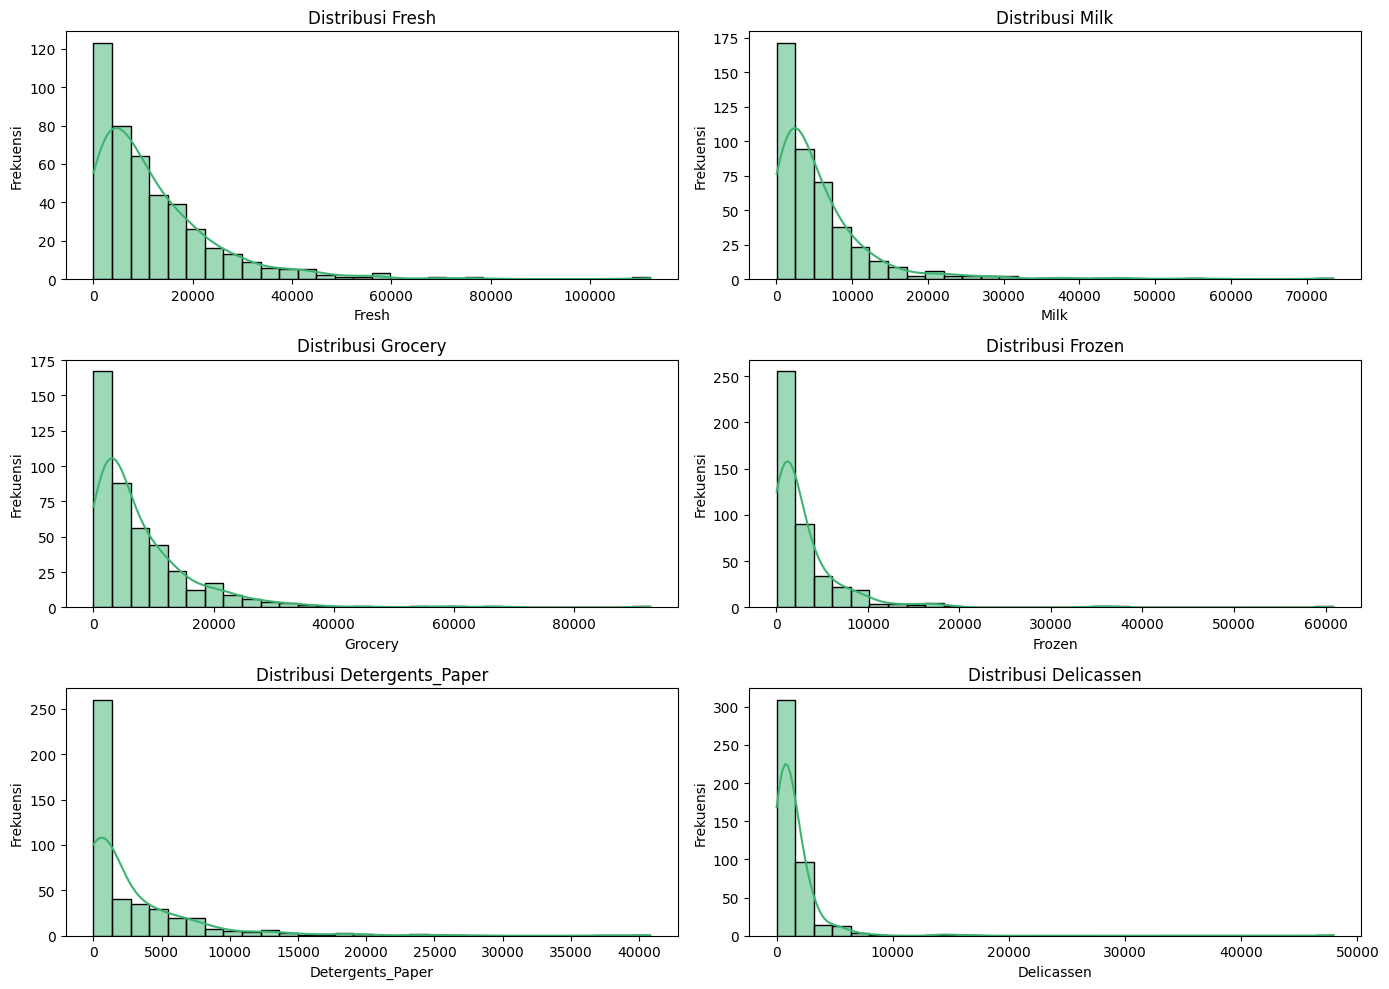

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# fitur pengeluaran
pengeluaran_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plt.figure(figsize=(14, 10))

# Histogram
for i, col in enumerate(pengeluaran_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [ ]:
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Korelasi antar Fitur')
# plt.show()

# **Scaling Data**

KMeans Clustering menggunakan jarak (Euclidean distance) sebagai dasar pengelompokan. Jika data tidak dinormalisasi, fitur dengan skala besar hasil cluster bisa bias terhadap fitur tertentu dan tidak merefleksikan hubungan sesungguhnya antar data

Tujuan Normalisasi Membuat semua fitur berada dalam skala yang sama, biasanya dalam rentang [0, 1].

In [ ]:
x = df.iloc[:, [2,3,4,5,6,7]]
y = (x - x.min()) / (x.max() - x.min())
y

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [ ]:
data = y.values.tolist()

* menyederhanakan struktur data agar mudah diproses dengan operasi dasar Python. Jika masih berupa DataFrame (pandas), maka perhitungan tidak akan jalan karena elemen-elemen DataFrame bukan float/int langsung.

# Pemodelan: KMeans Clustering (Tanpa Library)

1. Inisialisasi k titik pusat secara acak.

2. Hitung jarak Euclidean antara titik data dan tiap centroid.

3. Kelompokkan titik ke cluster terdekat.

4. Update centroid sebagai rata-rata dari anggota cluster.

5. Ulangi langkah 2–4 sampai centroid stabil (konvergen).

In [ ]:
import random
import math

# inisialisasi cluster awal
k = 2
max_iter = 100

# jarak Euclidean
def euclidean(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# Inisialisasi centroid acak
random.seed(42)
centroids = random.sample(data, k)

for iteration in range(max_iter):
    clusters = [[] for _ in range(k)]

    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        cluster_idx = distances.index(min(distances))
        clusters[cluster_idx].append(point)

    # menyimpan centroid lama
    old_centroids = centroids.copy()

    # mengupdate centroid
    new_centroids = []
    for cluster in clusters:
        if cluster:
            new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            new_centroid = random.choice(data)  #cluster kosong
        new_centroids.append(new_centroid)

    centroids = new_centroids

    # menampilkan iterasi
    print(f"\nIterasi ke-{iteration + 1}")
    for i, centroid in enumerate(centroids):
        print(f"  Centroid {i+1}: {centroid}")
    for i, cluster in enumerate(clusters):
        print(f"  Cluster {i+1}: {len(cluster)} data")

    # cek konvergensi
    if all(euclidean(c1, c2) < 1e-4 for c1, c2 in zip(old_centroids, centroids)):
        print(f"\n Konvergen pada iterasi ke-{iteration+1}")
        break


Iterasi ke-1
  Centroid 1: [0.10340560815045426, 0.03421822754672721, 0.035583595995928786, 0.051718622331583336, 0.016593617899834823, 0.021708385481852315]
  Centroid 2: [0.11322794432357244, 0.15509408657053775, 0.17332333175248174, 0.04720627752941951, 0.16486319321967463, 0.0493099447225699]
  Cluster 1: 280 data
  Cluster 2: 160 data

Iterasi ke-2
  Centroid 1: [0.11549103824459832, 0.04217117920169969, 0.04259130889154296, 0.05221449362807751, 0.02307526307753529, 0.02435476605470541]
  Centroid 2: [0.08263125356280454, 0.18112590477732946, 0.2088629233387207, 0.043967488901729725, 0.2061560365247824, 0.052879696111367294]
  Cluster 1: 326 data
  Cluster 2: 114 data

Iterasi ke-3
  Centroid 1: [0.11578940714303107, 0.04682036738797338, 0.04726480113962963, 0.053712172121760014, 0.02710990766012649, 0.02572013047048485]
  Centroid 2: [0.0740980332824405, 0.1951558073198161, 0.22897047272909338, 0.036517149798921685, 0.2324428598821271, 0.054226385131952576]
  Cluster 1: 347 data

# Evaluasi: Sum of Squared Error (SSE)

mengukur jarak kuadrat antara setiap titik data dalam cluster terhadap centroid cluster-nya. SSE menunjukkan seberapa kompak data dalam setiap cluster. Semakin kecil SSE, semakin baik (anggota cluster mendekati centroid).

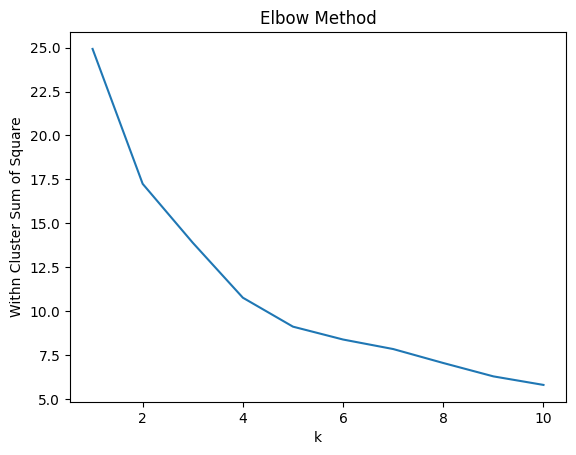

In [ ]:
from sklearn.cluster import KMeans
wcs=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=39)
  kmeans.fit(y)
  wcs.append(kmeans.inertia_)
plt.plot(range(1,11),wcs)
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Withn Cluster Sum of Square')
#plt.savefig("elbow.pdf", format="pdf", bbox_inches="tight")
plt.show()

* Menggunaan Library Kmeans khusus visualisasi Elbow Method untuk Melihat  titik tekuk (elbow) di k = 2
* Grafik Elbow menunjukkan penurunan drastis hingga k=2 atau k=3 lalu datar, artinya k = 2 adalah titik optimal dari segi efisiensi dan performa.

In [ ]:
import math

#jarak euclidean
def euclidean(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# menghitung SSE dari cluster
def compute_sse(clusters, centroids):
    sse = 0
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean(point, centroids[idx]) ** 2
    return sse

# hasil
sse = compute_sse(clusters, centroids)
print("SSE:", round(sse, 4))

SSE: 17.246


In [ ]:
# fungsi euclidean
def euclidean(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# silhouette score
def silhouette_score_point(point, own_cluster, other_clusters):
    if len(own_cluster) <= 1:
        return 0

    # menghitung a(i)
    a = sum(euclidean(point, other) for other in own_cluster if other != point) / (len(own_cluster) - 1)

    # menghitung b(i)
    b_values = []
    for cluster in other_clusters:
        if len(cluster) == 0:
            continue
        b = sum(euclidean(point, other) for other in cluster) / len(cluster)
        b_values.append(b)
    b = min(b_values)

    # menghitung silhouette score
    s = (b - a) / max(a, b)
    return s
def compute_silhouette_score(clusters):
    silhouette_scores = []
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            other_clusters = [c for i, c in enumerate(clusters) if i != idx]
            score = silhouette_score_point(point, cluster, other_clusters)
            silhouette_scores.append(score)

    overall_score = sum(silhouette_scores) / len(silhouette_scores)
    return overall_score

# hasil
score = compute_silhouette_score(clusters)
print("Silhouette Score:", round(score, 4))

Silhouette Score: 0.5708


* Nilai SSE 17.246 sudah cukup kecil untuk k=2. Digabung dengan silhouette score yang tinggi. Model clustering dengan k=2 adalah pilihan terbaik untuk data ini dari sisi pemisahan (silhouette) dan SSE

# Merge Data

In [ ]:
# Membuat list label
labels = [None] * len(data)
for cluster_index, cluster in enumerate(clusters):
    for point in cluster:
        index = data.index(point)
        labels[index] = cluster_index

In [ ]:
# menambahkan kolom cluster ke df
labels = [l + 1 for l in labels]
df['cluster'] = labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
df['cluster'].unique()

array([1, 2])

# Menggabungkan Cluster Dengan Scaling Data

In [ ]:
df_cluster = df['cluster']

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
df_channelreg = df[['Channel','Region']]

In [ ]:
df_normcluster = pd.concat([df_channelreg,y, df_cluster], axis=1)
df_normcluster

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,1
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,1
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,1
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,1
...,...,...,...,...,...,...,...,...,...
435,1,3,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,1
436,1,3,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,1
437,2,3,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,2
438,1,3,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,1


#  Visualisasi K-Means

* Data Awal Sebelum Normalisasi

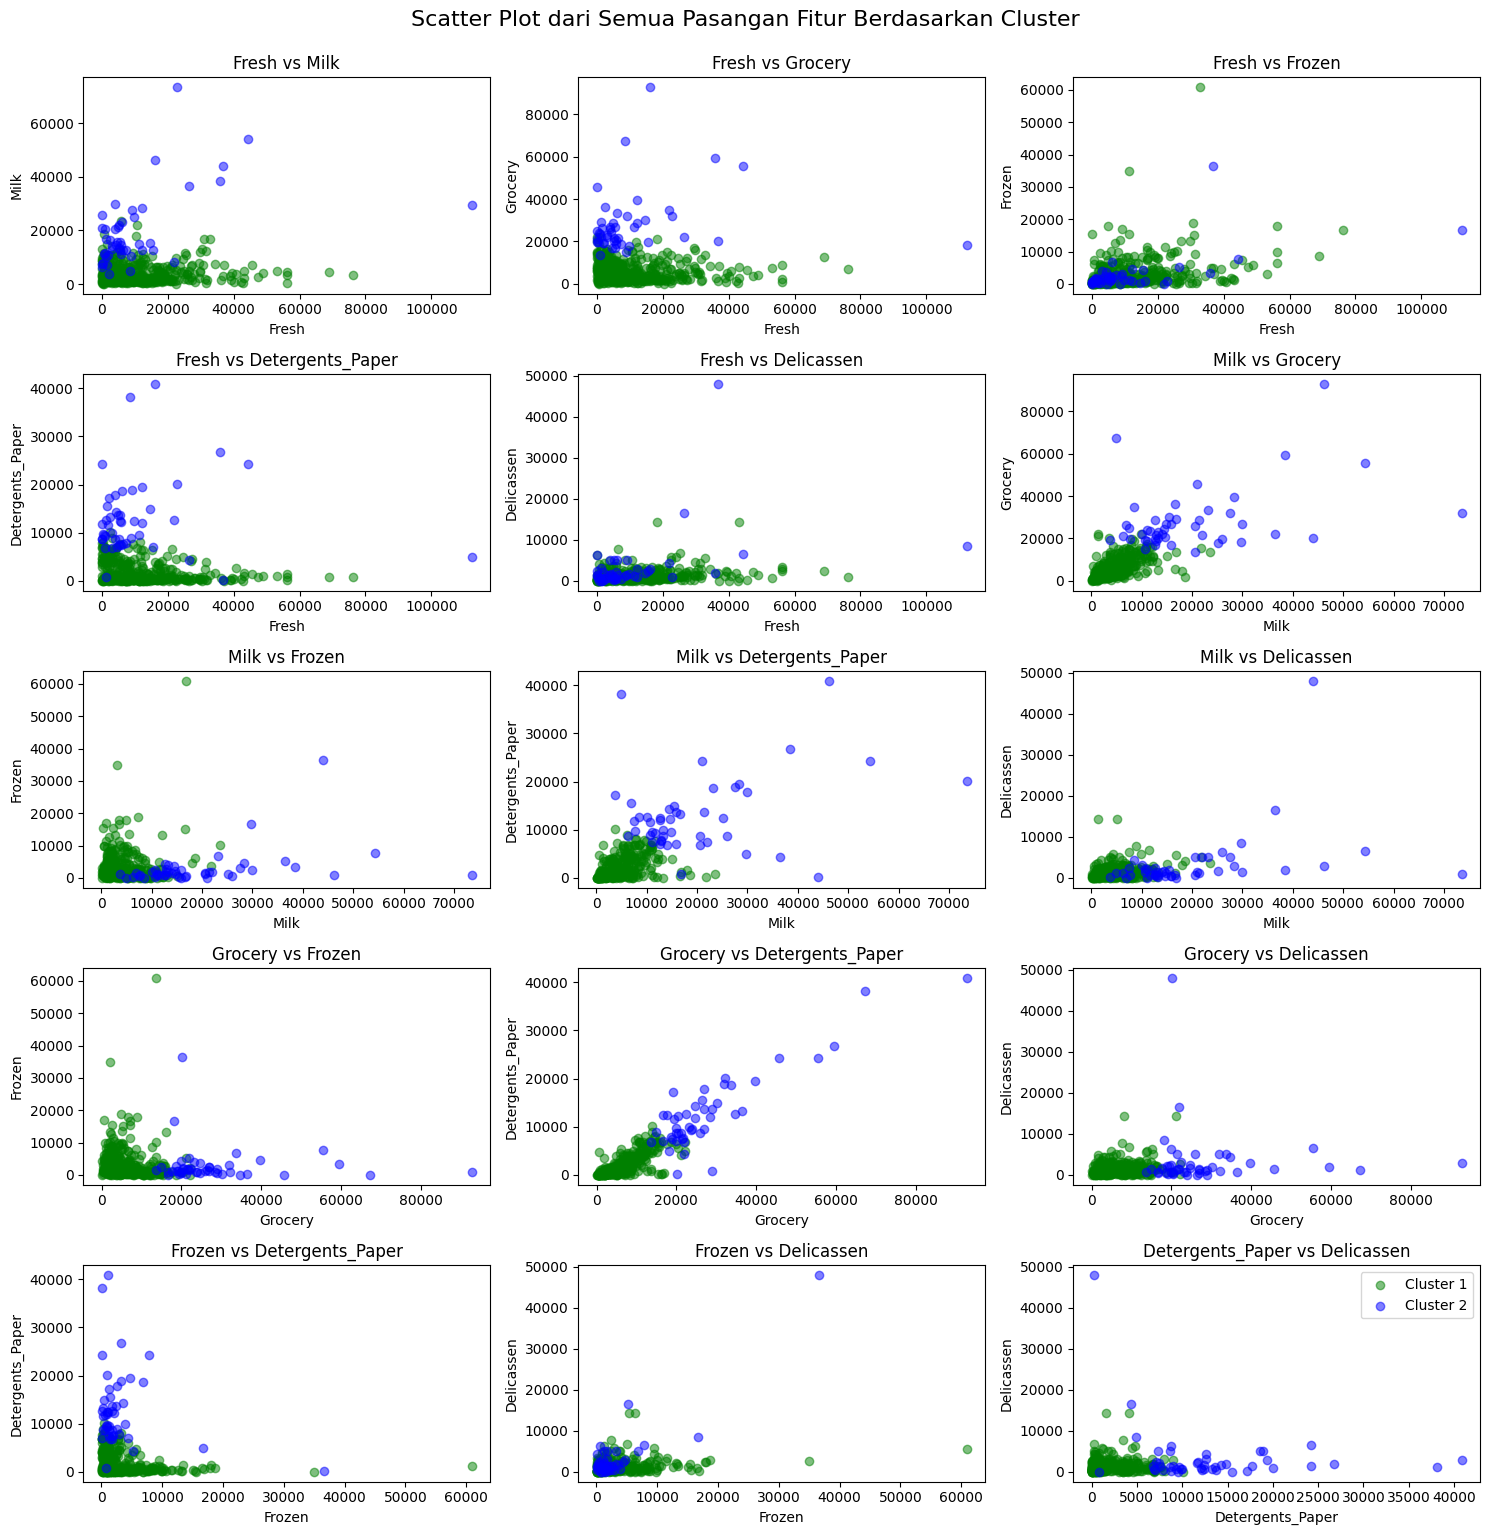

In [ ]:
import matplotlib.pyplot as plt
import itertools

# fitur pengeluaran
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
colors = ['red', 'green', 'blue', 'purple', 'orange']

# scatter plot
pairs = list(itertools.combinations(features, 2))
plt.figure(figsize=(15, 15))

for i, (x_feat, y_feat) in enumerate(pairs):
    plt.subplot(5, 3, i+1)
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster_id]
        plt.scatter(cluster_data[x_feat], cluster_data[y_feat],
                    color=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.5)
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f'{x_feat} vs {y_feat}')
    plt.tight_layout()

plt.legend()
plt.suptitle("Scatter Plot dari Semua Pasangan Fitur Berdasarkan Cluster", fontsize=16, y=1.02)
plt.show()


* Data Setelah Normalisasi


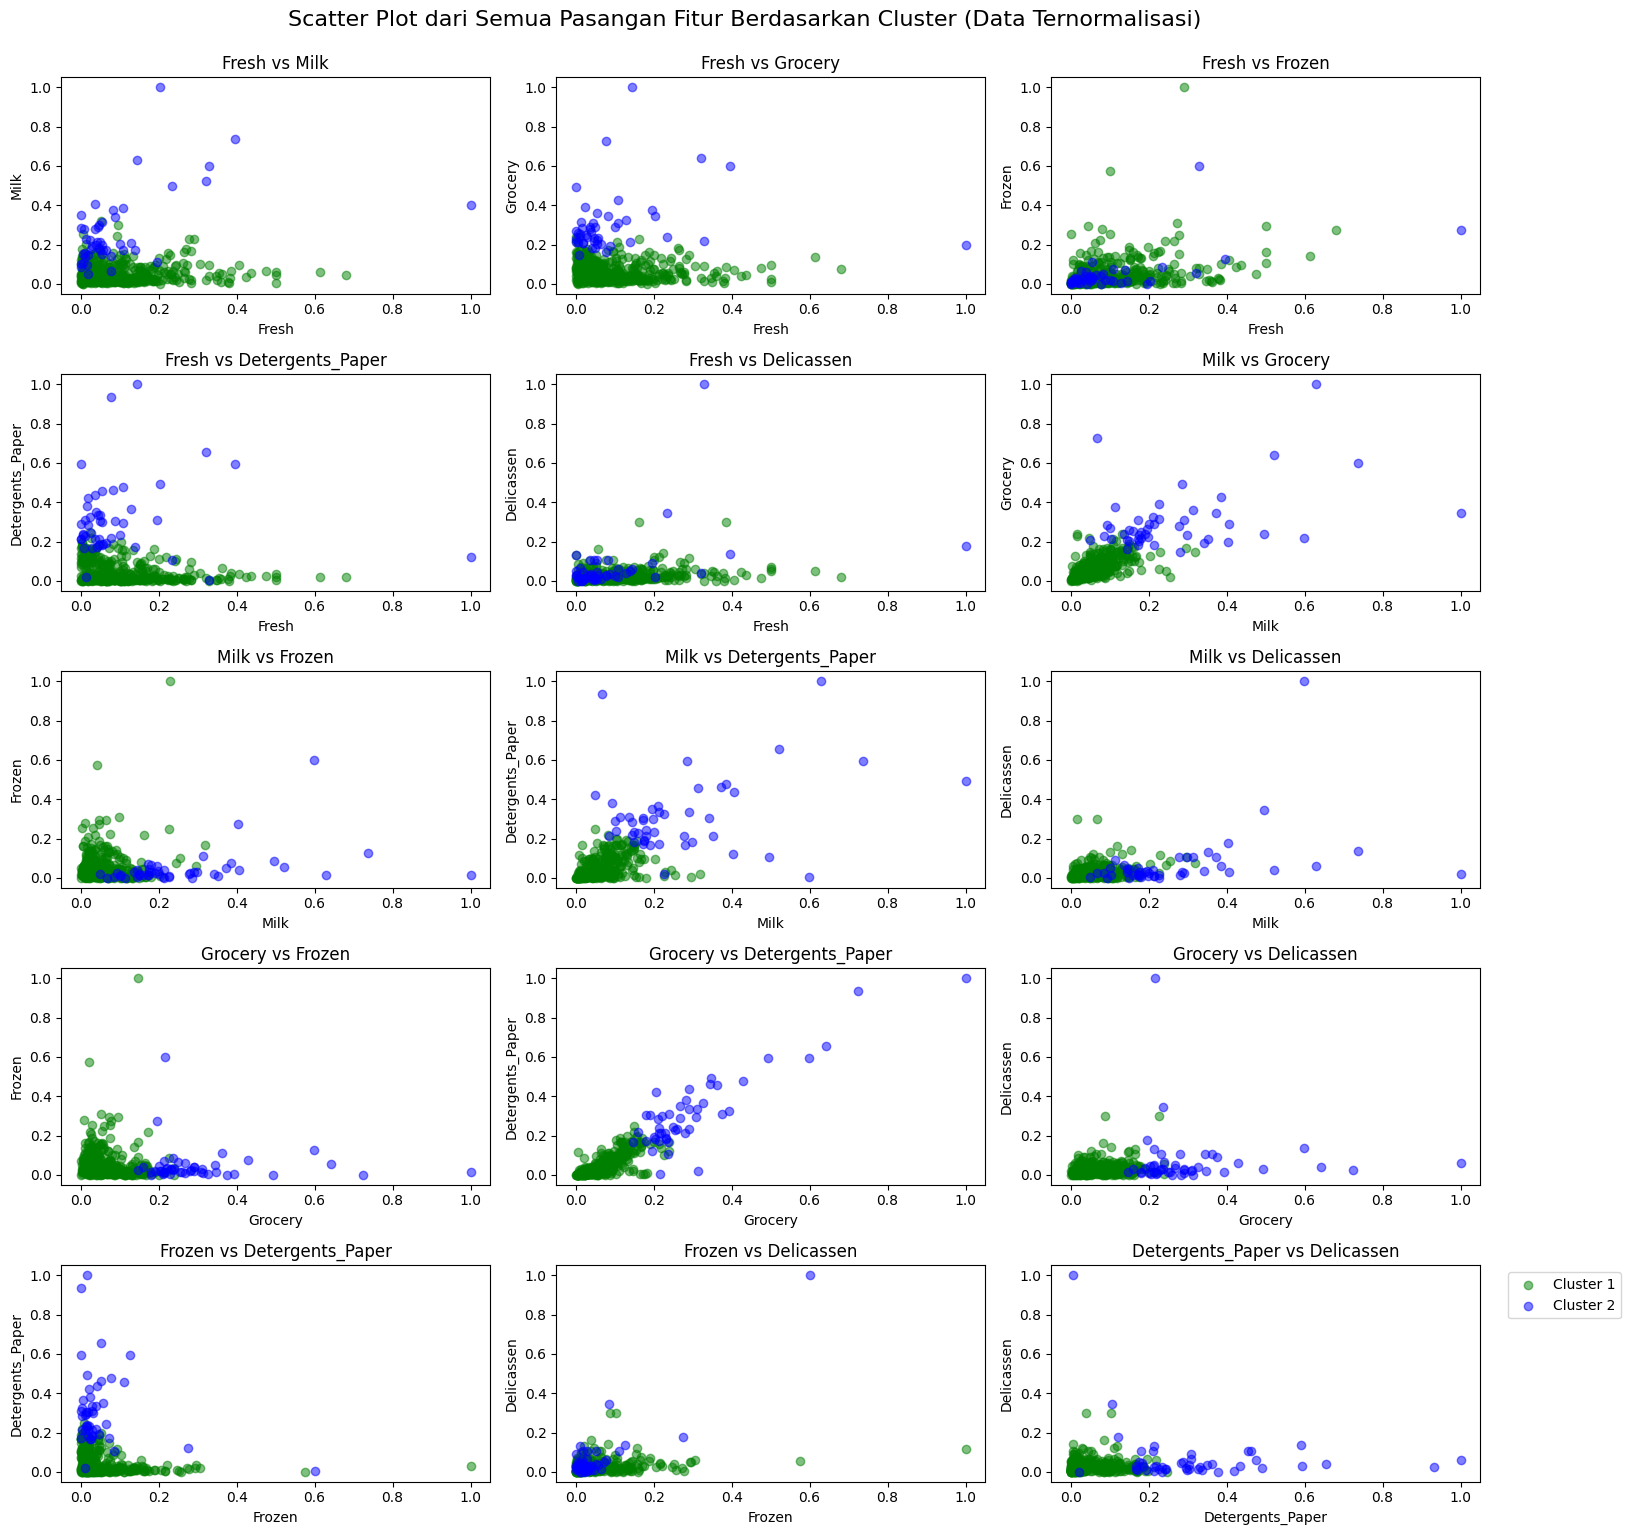

In [ ]:
import matplotlib.pyplot as plt
import itertools

# fitur pengeluaran
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
colors = ['red', 'green', 'blue', 'purple', 'orange']

# scatter plot
pairs = list(itertools.combinations(features, 2))
plt.figure(figsize=(15, 15))

for i, (x_feat, y_feat) in enumerate(pairs):
    plt.subplot(5, 3, i+1)
    for cluster_id in sorted(df_normcluster['cluster'].unique()):
        cluster_data = df_normcluster[df_normcluster['cluster'] == cluster_id]
        plt.scatter(cluster_data[x_feat], cluster_data[y_feat],
                    color=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.5)
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f'{x_feat} vs {y_feat}')
    plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle("Scatter Plot dari Semua Pasangan Fitur Berdasarkan Cluster (Data Ternormalisasi)", fontsize=16, y=1.02)
plt.show()


In [ ]:
print(df_normcluster['cluster'].value_counts())

cluster
1    393
2     47
Name: count, dtype: int64


<ipython-input-37-1918702824>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_clusters))  # Colormap dinamis


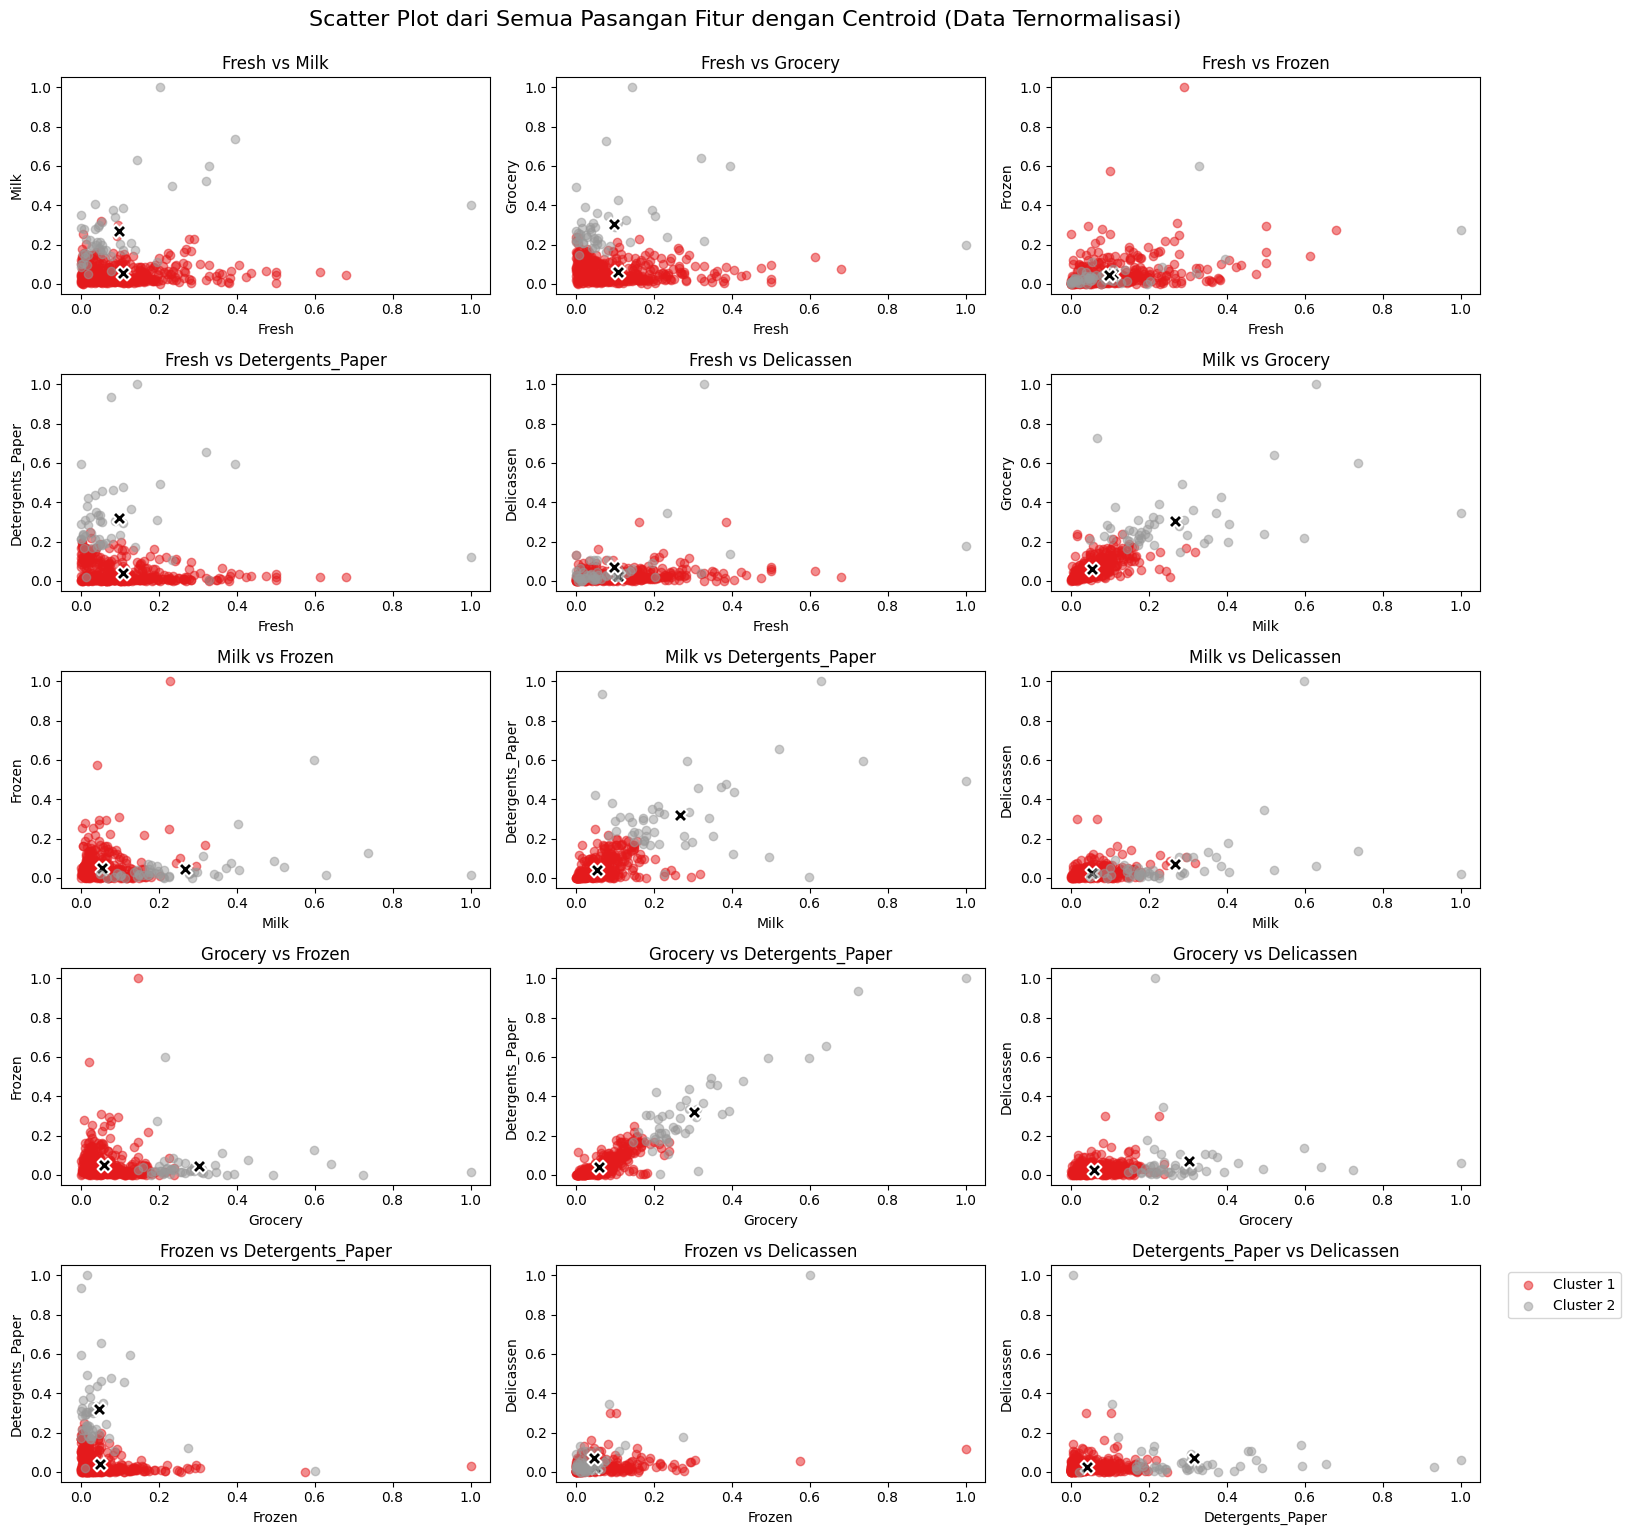

In [ ]:
import matplotlib.pyplot as plt
import itertools

# fitur pengeluaran
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
pairs = list(itertools.combinations(features, 2))

# mengambil semua label unik
unique_clusters = sorted(df_normcluster['cluster'].unique())
colors = plt.cm.get_cmap('Set1', len(unique_clusters))  # Colormap dinamis

plt.figure(figsize=(15, 15))

for i, (x_feat, y_feat) in enumerate(pairs):
    plt.subplot(5, 3, i+1)
    for idx, cluster_id in enumerate(unique_clusters):
        cluster_data = df_normcluster[df_normcluster['cluster'] == cluster_id]
        plt.scatter(cluster_data[x_feat], cluster_data[y_feat],
                    color=colors(idx), label=f'Cluster {cluster_id}', alpha=0.5)

        # menambahkan centroid
        x_idx = features.index(x_feat)
        y_idx = features.index(y_feat)
        if cluster_id - 1 < len(centroids):
            plt.scatter(centroids[cluster_id - 1][x_idx], centroids[cluster_id - 1][y_idx],
                        color='black', marker='X', s=100, edgecolor='white', linewidth=1.5)

    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f'{x_feat} vs {y_feat}')
    plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle("Scatter Plot dari Semua Pasangan Fitur dengan Centroid (Data Ternormalisasi)", fontsize=16, y=1.02)
plt.show()


<Axes: xlabel='cluster', ylabel='Count'>

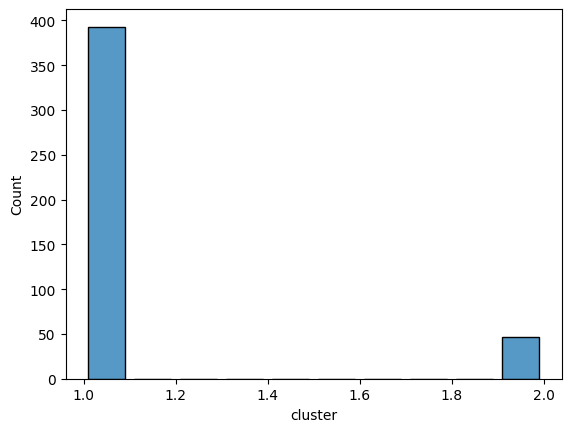

In [ ]:
sns.histplot(data=df, x='cluster', multiple="dodge", shrink=.8)

<ipython-input-21-1263642831>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_normcluster, palette='Set2')
<ipython-input-21-1263642831>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_normcluster, palette='Set2')
<ipython-input-21-1263642831>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_normcluster, palette='Set2')
<ipython-input-21-1263642831>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

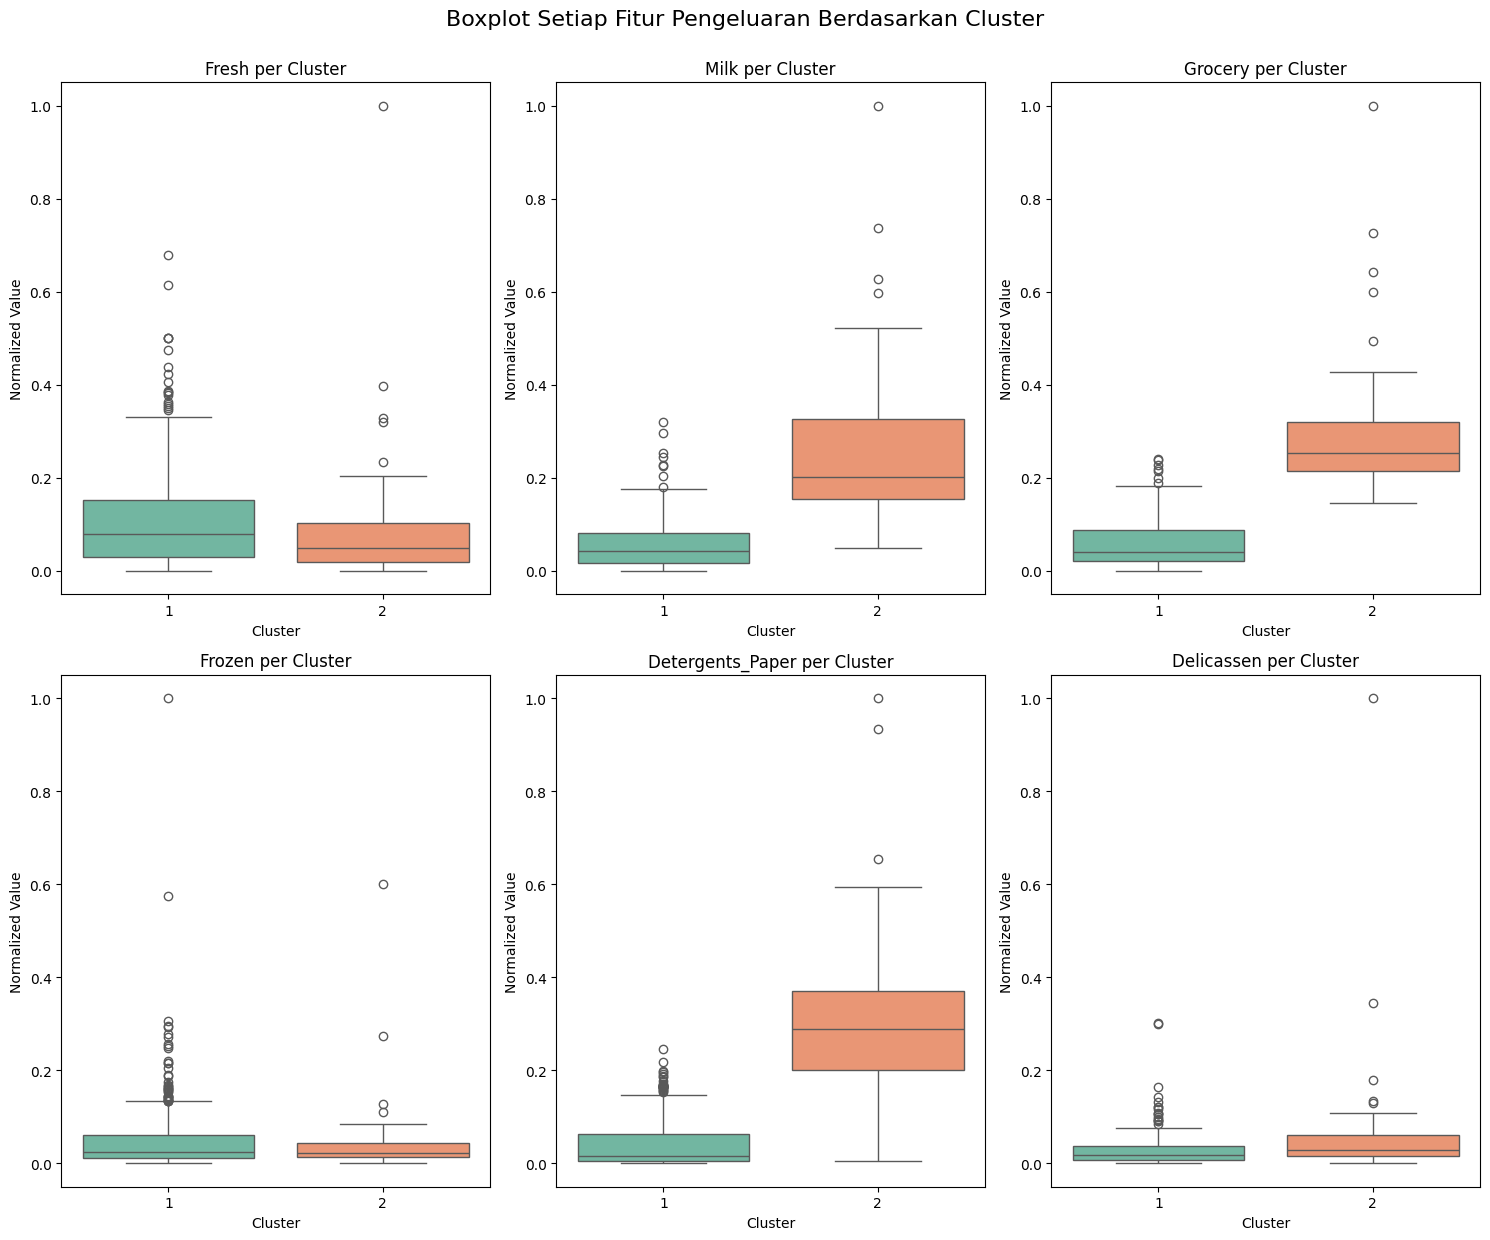

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_normcluster, palette='Set2')
    plt.title(f'{feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Normalized Value')

plt.tight_layout()
plt.suptitle('Boxplot Setiap Fitur Pengeluaran Berdasarkan Cluster', fontsize=16, y=1.03)
plt.show()


# Mengubah Channel dan Region Sesuai Keterangan Kategorikal

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,1


In [ ]:
print(df['Channel'].unique())
print(df['Region'].unique())

[2 1]
[3 1 2]


In [ ]:
df['Channel'] = df['Channel'].replace({1: 'Horeca', 2: 'Retail'})
df['Region'] = df['Region'].replace({1: 'Lisbon', 2: 'Oporto', 3: 'Other Region'})

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,Retail,Other Region,12669,9656,7561,214,2674,1338,1
1,Retail,Other Region,7057,9810,9568,1762,3293,1776,1
2,Retail,Other Region,6353,8808,7684,2405,3516,7844,1
3,Horeca,Other Region,13265,1196,4221,6404,507,1788,1
4,Retail,Other Region,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,Horeca,Other Region,29703,12051,16027,13135,182,2204,1
436,Horeca,Other Region,39228,1431,764,4510,93,2346,1
437,Retail,Other Region,14531,15488,30243,437,14841,1867,2
438,Horeca,Other Region,10290,1981,2232,1038,168,2125,1


In [ ]:
df_normcluster['Channel'] = df['Channel']
df_normcluster['Region'] = df['Region']

In [ ]:
df.to_excel('df_save.xlsx', index=False)